In [2]:
import json
import numpy as np
import re
import os
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# load results

current_directory = os.getcwd()

results_array_FF = np.load(os.path.join(current_directory, 'exp_data', "results_pd_FF.npy"))
reasons_array_FF = np.load(os.path.join(current_directory, 'exp_data', "reasons_pd_FF.npy"), allow_pickle=True)

results_array_FS = np.load(os.path.join(current_directory, 'exp_data', "results_pd_FS.npy"))
reasons_array_FS = np.load(os.path.join(current_directory, 'exp_data', "reasons_pd_FS.npy"), allow_pickle=True)

results_array_SS = np.load(os.path.join(current_directory, 'exp_data', "results_pd_SS.npy"))
reasons_array_SS = np.load(os.path.join(current_directory, 'exp_data', "reasons_pd_SS.npy"), allow_pickle=True)

# define parameters
rounds_num = 5
all_treat = ['FF', 'SS', 'FS']
colors = {'FF': 'blue', 'SS': 'red', 'FS': 'g'}
names = {'FF': 'fair-fair (FF)', 'SS': 'selfish-selfish (SS)', 'FS': 'fair-selfish (FS)'}
results_array = {'FF': results_array_FF, 'SS': results_array_SS, 'FS': results_array_FS}
reasons_array = {'FF': reasons_array_FF, 'SS': reasons_array_SS, 'FS': reasons_array_FS}

all_treat2 = ['FwF', 'FwS', 'SwF', 'SwS']
colors2 = {'FwF': 'blue', 'SwS': 'red', 'FwS': 'green', 'SwF': 'black'}
names2 = {'FwF': 'fair (with fair)', 'SwS': 'selfish (with selfish)', 'FwS': 'fair (with selfish)', 'SwF': 'selfish (with fair)'}


# print the length of the results
print(len(results_array_FF))
print(len(results_array_SS))
print(len(results_array_FS))
print(len(reasons_array_FF))
print(len(reasons_array_SS))
print(len(reasons_array_FS))

100
100
100
100
100
100


In [4]:
# create a dataframe extracting the data for fair and selfish players, with column simulation_num, own_feature, other_feature, treatment, 
# round, choice, other_choice reason, last_own_choice, last_other_choice, last_AA, last_BB, last_AB, last_BA

import pandas as pd

# check if df_all.csv exists in the directory
if os.path.exists(os.path.join(current_directory, 'exp_data', "df_all.csv")):
    df_all = pd.read_csv(os.path.join(current_directory, 'exp_data', "df_all.csv"))
    print('df_all.csv exists in the directory')
    print('df_all.csv has {} rows'.format(len(df_all)))

else:
    print('df_all.csv does not exist in the directory')
    id_array = []
    simulation_num_array = []
    rounds_array = []
    choice_array = []
    reason_array = []
    treatment_array = []
    own_feature_array = []
    other_feature_array = []
    other_choice_array = []
    last_own_choice_array = []
    last_other_choice_array = []

    for treatment in all_treat:
        for i in range(len(results_array[treatment])):
            for j in range(rounds_num):
                id_array.append(i*1000 + j*100 + 1) # assign a unique id to each row
                simulation_num_array.append(i) # simulation number
                rounds_array.append(j+1) # round number
                treatment_array.append(treatment)

                if j == 0:
                    last_own_choice_array.append(-1) # if it is the first round, last_own_choice is -1
                    last_other_choice_array.append(-1)
                else:
                    last_own_choice_array.append(results_array[treatment][i][j-1][0])
                    last_other_choice_array.append(results_array[treatment][i][j-1][1])
                
                # add the feature of the player and the other player
                if treatment == 'FF':
                    own_feature_array.append('fair')
                    other_feature_array.append('fair')
                    choice_array.append(results_array[treatment][i][j][0])
                    reason_array.append(reasons_array[treatment][i][j][0])
                    other_choice_array.append(results_array[treatment][i][j][1])
               
                elif treatment == 'SS':
                    own_feature_array.append('selfish')
                    other_feature_array.append('selfish')
                    choice_array.append(results_array[treatment][i][j][0])
                    reason_array.append(reasons_array[treatment][i][j][0])
                    other_choice_array.append(results_array[treatment][i][j][1])

                elif treatment == 'FS':
                    own_feature_array.append('fair')
                    other_feature_array.append('selfish')
                    choice_array.append(results_array[treatment][i][j][0])
                    reason_array.append(reasons_array[treatment][i][j][0])
                    other_choice_array.append(results_array[treatment][i][j][1])

    # the results for the "second" player
    for treatment in all_treat:
        for i in range(len(results_array[treatment])):
            for j in range(rounds_num):
                id_array.append(i*1000 + j*100 + 1)
                simulation_num_array.append(i)
                rounds_array.append(j+1)
                treatment_array.append(treatment)

                if j == 0:
                    last_own_choice_array.append(-1)
                    last_other_choice_array.append(-1)
                else:
                    last_own_choice_array.append(results_array[treatment][i][j-1][1])
                    last_other_choice_array.append(results_array[treatment][i][j-1][0])
                
                if treatment == 'FF':
                    own_feature_array.append('fair')
                    other_feature_array.append('fair')
                    choice_array.append(results_array[treatment][i][j][1])
                    reason_array.append(reasons_array[treatment][i][j][1])
                    other_choice_array.append(results_array[treatment][i][j][0])

                
                elif treatment == 'SS':
                    own_feature_array.append('selfish')
                    other_feature_array.append('selfish')
                    choice_array.append(results_array[treatment][i][j][1])
                    reason_array.append(reasons_array[treatment][i][j][1])
                    other_choice_array.append(results_array[treatment][i][j][0])

                elif treatment == 'FS':
                    own_feature_array.append('selfish')
                    other_feature_array.append('fair')
                    choice_array.append(results_array[treatment][i][j][1])
                    reason_array.append(reasons_array[treatment][i][j][1])
                    other_choice_array.append(results_array[treatment][i][j][0])

    # create the dataframe
    import pandas as pd
    df_all = pd.DataFrame()
    df_all['simulation_num'] = simulation_num_array
    df_all['round'] = rounds_array
    df_all['choice'] = choice_array
    df_all['reason'] = reason_array
    df_all['treatment'] = treatment_array
    df_all['own_feature'] = own_feature_array
    df_all['other_feature'] = other_feature_array
    df_all['other_choice'] = other_choice_array
    df_all['last_own_choice'] = last_own_choice_array
    df_all['last_other_choice'] = last_other_choice_array


    # dummy column last_AA, last_BB, last_AB, last_BA
    df_all['last_AA'] = 0
    df_all['last_BB'] = 0
    df_all['last_AB'] = 0
    df_all['last_BA'] = 0
    df_all.loc[(df_all['last_own_choice'] == 0) & (df_all['last_other_choice'] == 0), 'last_AA'] = 1
    df_all.loc[(df_all['last_own_choice'] == 1) & (df_all['last_other_choice'] == 1), 'last_BB'] = 1
    df_all.loc[(df_all['last_own_choice'] == 0) & (df_all['last_other_choice'] == 1), 'last_AB'] = 1
    df_all.loc[(df_all['last_own_choice'] == 1) & (df_all['last_other_choice'] == 0), 'last_BA'] = 1

    df_all.to_csv(os.path.join(current_directory, 'exp_data', "df_all.csv"), index=False)


df_all

df_all.csv exists in the directory
df_all.csv has 3000 rows


,simulation_num,round,choice,reason,treatment,own_feature,other_feature,other_choice,last_own_choice,last_other_choice,last_AA,last_BB,last_AB,last_BA,pd_text_error_analysed,error_pd,pd_text_coop_repu_alt_analysed,reputation_building_pd,altruism_pd
0,0,1,0.0,"As it is the first round, there is no historic...",FF,fair,fair,0.0,-1.0,-1.0,0,0,0,0,False,NaN,True,1.0,0.0
1,0,2,0.0,Since both players chose to cooperate in the f...,FF,fair,fair,0.0,0.0,0.0,1,0,0,0,False,NaN,True,1.0,0.0
2,0,3,0.0,The other player has chosen to cooperate in th...,FF,fair,fair,0.0,0.0,0.0,1,0,0,0,False,NaN,True,1.0,0.0
3,0,4,0.0,"Given the previous rounds, where both players ...",FF,fair,fair,0.0,0.0,0.0,1,0,0,0,False,NaN,True,1.0,1.0
4,0,5,0.0,Given the history of mutual cooperation betwee...,FF,fair,fair,0.0,0.0,0.0,1,0,0,0,True,1.0,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,99,1,1.0,"As this is the first round, there is no inform...",FS,selfish,fair,0.0,-1.0,-1.0,0,0,0,0,False,NaN,False,NaN,NaN
2996,99,2,1.0,"Given the first round, the other player may ex...",FS,selfish,fair,1.0,1.0,0.0,0,0,0,1,False,NaN,False,NaN,NaN
2997,99,3,1.0,The other player has learned that defecting wh...,FS,selfish,fair,1.0,1.0,1.0,0,1,0,0,False,NaN,False,NaN,NaN
2998,99,4,1.0,Given the pattern of consistent defection in t...,FS,selfish,fair,1.0,1.0,1.0,0,1,0,0,False,NaN,False,NaN,NaN


In [8]:
# for each treatment, calculate the rate of choosing A, and the rate of AA, BB, AB or BA
# own_choice = 0 means choosing A, own_choice = 1 means choosing B, other_choice = 0 means other chooses A, other_choice = 1 means other chooses B

# calculate the standard error
def standard_error(p, n):
    return np.sqrt(p*(1-p)/n)

for treat in all_treat:
    print('=====================')
    print('treatment {}'.format(treat))
    df_treat = df_all[df_all['treatment'] == treat]
    print('number of rows: {}'.format(len(df_treat)))
    print('number of choosing A: {}'.format(len(df_treat[df_treat['choice'] == 0])))
    print('number of choosing B: {}'.format(len(df_treat[df_treat['choice'] == 1])))
    print('rate of choosing A: {}'.format(len(df_treat[df_treat['choice'] == 0])/len(df_treat)))
    print('rate of choosing B: {}'.format(len(df_treat[df_treat['choice'] == 1])/len(df_treat)))
    print('rate of AA: {}'.format(len(df_treat[(df_treat['choice'] == 0) & (df_treat['other_choice'] == 0)])/len(df_treat)))
    print('rate of BB: {}'.format(len(df_treat[(df_treat['choice'] == 1) & (df_treat['other_choice'] == 1)])/len(df_treat)))
    print('rate of AB or BA: {}'.format( (len(df_treat[(df_treat['choice'] == 0) & (df_treat['other_choice'] == 1)]) + len(df_treat[(df_treat['choice'] == 1) & (df_treat['other_choice'] == 0)]))/len(df_treat)))
    print('standard error of choosing A: {}'.format(standard_error(len(df_treat[df_treat['choice'] == 0])/len(df_treat), len(df_treat))))
    print('standard error of choosing B: {}'.format(standard_error(len(df_treat[df_treat['choice'] == 1])/len(df_treat), len(df_treat))))

    num = len(df_treat)/2
    print('standard error of AA: {}'.format(standard_error(len(df_treat[(df_treat['choice'] == 0) & (df_treat['other_choice'] == 0)])/len(df_treat), num)))
    print('standard error of BB: {}'.format(standard_error(len(df_treat[(df_treat['choice'] == 1) & (df_treat['other_choice'] == 1)])/len(df_treat), num)))
    print('standard error of AB or BA: {}'.format(standard_error((len(df_treat[(df_treat['choice'] == 0) & (df_treat['other_choice'] == 1)]) + len(df_treat[(df_treat['choice'] == 1) & (df_treat['other_choice'] == 0)]))/len(df_treat), num)))

    

treatment FF
number of rows: 1000
number of choosing A: 994
number of choosing B: 6
rate of choosing A: 0.994
rate of choosing B: 0.006
rate of AA: 0.988
rate of BB: 0.0
rate of AB or BA: 0.012
standard error of choosing A: 0.002442130217658347
standard error of choosing B: 0.002442130217658346
standard error of AA: 0.004869496893930627
standard error of BB: 0.0
standard error of AB or BA: 0.004869496893930624
treatment SS
number of rows: 1000
number of choosing A: 91
number of choosing B: 909
rate of choosing A: 0.091
rate of choosing B: 0.909
rate of AA: 0.026
rate of BB: 0.844
rate of AB or BA: 0.13
standard error of choosing A: 0.009094998625618368
standard error of choosing B: 0.009094998625618366
standard error of AA: 0.007116740827092132
standard error of BB: 0.01622738426241272
standard error of AB or BA: 0.015039946808416579
treatment FS
number of rows: 1000
number of choosing A: 189
number of choosing B: 811
rate of choosing A: 0.189
rate of choosing B: 0.811
rate of AA: 0.02

In [21]:
# another way of calculating the above

from scipy.stats import sem

def standard_error(p, n):
    return np.sqrt(p*(1-p)/n)
    
def sep(binary_array):
    n = len(binary_array)
    p = np.sum(binary_array) / n
    se_proportion = np.sqrt(p * (1 - p) / n)
    return se_proportion

for treat in all_treat:
  print('====================')
  print(treat)
  print(f'mean cooperation rate: {1 - np.mean(results_array[treat])} ({sep(results_array[treat].reshape(-1))})')

  choices_sum = np.sum(results_array[treat], axis=-1)

  BB_binary = (choices_sum == 2).astype(int).reshape(-1)
  BA_binary = (choices_sum == 1).astype(int).reshape(-1)
  AA_binary = (choices_sum == 0).astype(int).reshape(-1)

  print(f'mean of BB:{np.mean(BB_binary)} ({ sep(BB_binary) })')
  print(f'mean of AB:{np.mean(BA_binary)} ({ sep(BA_binary) })')
  print(f'mean of AA:{np.mean(AA_binary)} ({ sep(AA_binary) })')

  # report the p value of each value compared to 0
  print('p value of cooperation rate: {}'.format(stats.ttest_1samp(1-results_array[treat].reshape(-1), 0)[1]))
  print('p value of BB: {}'.format(stats.ttest_1samp(BB_binary, 0)[1]))
  print('p value of AB: {}'.format(stats.ttest_1samp(BA_binary, 0)[1]))
  print('p value of AA: {}'.format(stats.ttest_1samp(AA_binary, 0)[1]))


FF
mean cooperation rate: 0.994 (0.002442130217658346)
mean of BB:0.0 (0.0)
mean of AB:0.012 (0.004869496893930624)
mean of AA:0.988 (0.004869496893930627)
p value of cooperation rate: 0.0
p value of BB: nan
p value of AB: 0.01415915414311404
p value of AA: 0.0
SS
mean cooperation rate: 0.09099999999999997 (0.009094998625618366)
mean of BB:0.844 (0.01622738426241272)
mean of AB:0.13 (0.015039946808416579)
mean of AA:0.026 (0.007116740827092132)
p value of cooperation rate: 1.6632467648997706e-22
p value of BB: 1.879006121295271e-203
p value of AB: 7.945734906428669e-17
p value of AA: 0.0002902161439291878
FS
mean cooperation rate: 0.18899999999999995 (0.012380589646701)
mean of BB:0.644 (0.021413266915629666)
mean of AB:0.334 (0.02109236828807993)
mean of AA:0.022 (0.006559878047646922)
p value of cooperation rate: 2.0791805803223546e-47
p value of BB: 5.4265759053601886e-114
p value of AB: 5.570669897272872e-46
p value of AA: 0.0008681965651601776


treatment FwF
treatment FwS
treatment SwF
treatment SwS


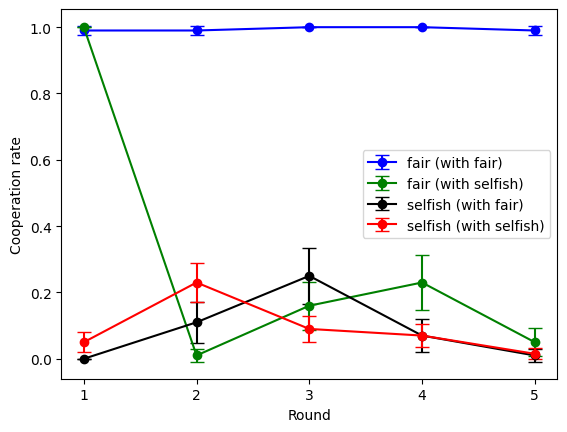

In [10]:
# plot the cooperation rate as a function of round for each case in all_treat2. That is, when own is fair, other is fair, when own is fair, other is selfish, when own is selfish, other is fair, when own is selfish, other is selfish

for treat2 in all_treat2:
    print('treatment {}'.format(treat2))
    if treat2 == 'FwF':
        df_treat = df_all[(df_all['own_feature'] == 'fair') & (df_all['other_feature'] == 'fair')]
    elif treat2 == 'FwS':
        df_treat = df_all[(df_all['own_feature'] == 'fair') & (df_all['other_feature'] == 'selfish')]
    elif treat2 == 'SwS':
        df_treat = df_all[(df_all['own_feature'] == 'selfish') & (df_all['other_feature'] == 'selfish')]
    elif treat2 == 'SwF':
        df_treat = df_all[(df_all['own_feature'] == 'selfish') & (df_all['other_feature'] == 'fair')]

    # calculate the cooperation rate for each round and plot it with 95 confidence interval
    cooperation_rate = []
    cooperation_rate_se = []

    for i in range(rounds_num):
        df_round = df_treat[df_treat['round'] == i+1]
        coop_rate_round = len(df_round[df_round['choice'] == 0])/len(df_round)
        cooperation_rate.append(coop_rate_round)
        se_round = standard_error(coop_rate_round, len(df_round))
        cooperation_rate_se.append(se_round)





    plt.errorbar(range(1, rounds_num+1), cooperation_rate, fmt='-o',  yerr= np.array(cooperation_rate_se)*1.96, label=names2[treat2], color=colors2[treat2], capsize=5)
    plt.xticks(range(1, rounds_num+1))
    plt.xlabel('Round')
    plt.ylabel('Cooperation rate')
    plt.legend()

plt.show()


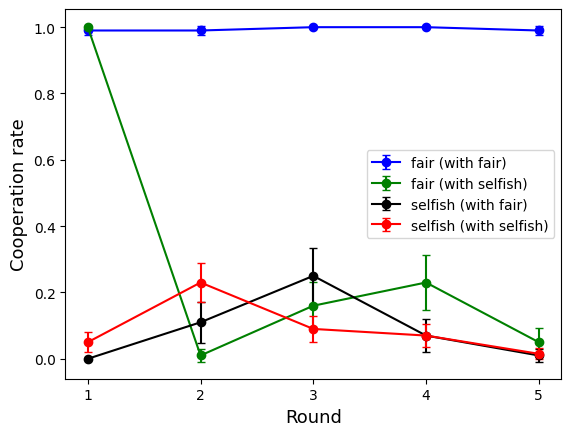

In [11]:
# another way of plotting the figure above

for treat2 in all_treat2:
  mean_coop = []
  se_coop = []
  for t in range(rounds_num):
    if treat2 == 'FwF':
      treat = 'FF'
      choice_rnd = results_array[treat][:, t].reshape(-1)
    elif treat2 == 'SwS':
      treat = 'SS'
      choice_rnd = results_array[treat][:, t].reshape(-1)
    elif treat2 == 'FwS':
      treat = 'FS'
      choice_rnd = results_array[treat][:, t, 0].reshape(-1)
    elif treat2 == 'SwF':
      treat = 'FS'
      choice_rnd = results_array[treat][:, t, 1].reshape(-1)


    mean_coop.append(1 - np.mean(choice_rnd) )
    se_coop.append( sep(choice_rnd) )

  x = np.arange(1, 6)
  plt.errorbar(x, np.array(mean_coop), yerr= 1.96 * np.array(se_coop), fmt='-o', color=colors2[treat2], label=names2[treat2], capsize=3)

plt.xlabel('Round', fontsize = 13)
plt.ylabel('Cooperation rate', fontsize = 13)
plt.legend()
plt.xticks(np.arange(1, 6, step=1))



filepath = os.path.join(current_directory, 'plots')
plt.savefig(os.path.join(filepath, 'coop_rnd.png'), dpi = 150)
plt.show()



In [12]:
def cond_coop(big_array):
  '''
  Args:
    big_array: a 3d array of shape (num_simulations, num_rounds, 2)
    
  Returns:
    a dictionary with keys AA, AB, BA, BB, each corresponding to a 1d array of length num_simulations * num_rounds
  '''

  num_simulations, num_rounds, _ = big_array.shape

  choice_AA = []
  choice_AB = []
  choice_BA = []
  choice_BB = []

  for sim in range(num_simulations):
    for t in range(4):
      c1, c2 = big_array[sim][t]
      if (int(c1) == 0) & (int(c2) == 0):
        choice_AA.extend(big_array[sim][t+1])
      elif (int(c1) == 0) & (int(c2) == 1):
        choice_AB.append(big_array[sim][t+1][0])
        choice_BA.append(big_array[sim][t+1][1])
      elif (int(c1) == 1) & (int(c2) == 0):
        choice_AB.append(big_array[sim][t+1][1])
        choice_BA.append(big_array[sim][t+1][0])
      elif (int(c1) == 1) & (int(c2) == 1):
        choice_BB.extend(big_array[sim][t+1])

  return {'AA': np.array(choice_AA), 'AB': np.array(choice_AB), 'BA': np.array(choice_BA), 'BB': np.array(choice_BB)}

In [13]:
# get the conditional cooperation rate for each treatment

for treat in all_treat:
  print('====================')
  print(treat)
  conditional_choice = cond_coop(results_array[treat])
  print(f"Cooperation rate when both players chose A in the previous round: {1 - np.mean(conditional_choice['AA'])} ({sep(conditional_choice['AA'])})" )
  print(f"Cooperation rate when I chose A and the other chose B in the previous round: {1 -  np.mean(conditional_choice['AB'])} ({sep(conditional_choice['AB'])})" )
  print(f"Cooperation rate when I chose B and the other chose A in the previous round: {1 - np.mean(conditional_choice['BA'])} ({sep(conditional_choice['BA'])})" )
  print(f"Cooperation rate when both players chose B in the previous round: {1 - np.mean(conditional_choice['BB'])} ({sep(conditional_choice['BB'])})" )

choice_AA_FF, choice_AB_FF, choice_BA_FF, choice_BB_FF = cond_coop(results_array_FF)
choice_AA_FS, choice_AB_FS, choice_BA_FS, choice_BB_FS = cond_coop(results_array_FS)
choice_AA_SS, choice_AB_SS, choice_BA_SS, choice_BB_SS = cond_coop(results_array_SS)



FF
Cooperation rate when both players chose A in the previous round: 0.9974747474747475 (0.0017833671849435903)
Cooperation rate when I chose A and the other chose B in the previous round: 0.5 (0.25)
Cooperation rate when I chose B and the other chose A in the previous round: 1.0 (0.0)
Cooperation rate when both players chose B in the previous round: nan (nan)
SS
Cooperation rate when both players chose A in the previous round: 0.7916666666666666 (0.08289816934939807)
Cooperation rate when I chose A and the other chose B in the previous round: 0.015625 (0.015502449088269086)
Cooperation rate when I chose B and the other chose A in the previous round: 0.125 (0.04133986423538423)
Cooperation rate when both players chose B in the previous round: 0.08179012345679015 (0.010765492651972823)
FS
Cooperation rate when both players chose A in the previous round: 0.5 (0.10660035817780522)
Cooperation rate when I chose A and the other chose B in the previous round: 0.03105590062111796 (0.013671258

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/2b/1jfpbk6s1fl1h1jnnmr1vx1m0000gn/T/ipykernel_42538/3915300149.py:10: RuntimeWarning: invalid value encountered in scalar divide
  p = np.sum(binary_array) / n


In [14]:
def cond_coop_feature(feature):
    '''
    Args:
    feature can be 'fair' or 'selfish'

    Returns:
    a dictionary with keys 'AA', 'AB', 'BA', 'BB', and values the corresponding conditional choices
    '''

    if feature == 'fair':
        big_array1 = results_array_FF

    elif feature == 'selfish':
        big_array1 = results_array_SS
    
    big_array_mix = results_array_FS

    num_simulations, num_rounds, _ = big_array1.shape

    choice_AA = []
    choice_AB = []
    choice_BA = []
    choice_BB = []

    for sim in range(num_simulations):
        for t in range(4):
            c1, c2 = big_array1[sim][t]
            if (int(c1) == 0) & (int(c2) == 0):
                choice_AA.extend(big_array1[sim][t+1])
            elif (int(c1) == 0) & (int(c2) == 1):
                choice_AB.append(big_array1[sim][t+1][0])
                choice_BA.append(big_array1[sim][t+1][1])
            elif (int(c1) == 1) & (int(c2) == 0):
                choice_AB.append(big_array1[sim][t+1][1])
                choice_BA.append(big_array1[sim][t+1][0])
            elif (int(c1) == 1) & (int(c2) == 1):
                choice_BB.extend(big_array1[sim][t+1])

    num_simulations, num_rounds, _ = big_array_mix.shape
    for sim in range(num_simulations):
        for t in range(4):
            c3, c4 = big_array_mix[sim][t]
            if (int(c3) == 0) & (int(c4) == 0):
                if feature == 'fair':
                    choice_AA.append(big_array_mix[sim][t+1][0])
                elif feature == 'selfish':
                    choice_AA.append(big_array_mix[sim][t+1][1])

            elif (int(c3) == 0) & (int(c4) == 1):
                if feature == 'fair':
                    choice_AB.append(big_array_mix[sim][t+1][0])
                elif feature == 'selfish':
                    choice_BA.append(big_array_mix[sim][t+1][1])

            elif (int(c3) == 1) & (int(c4) == 0):
                if feature == 'fair':
                    choice_BA.append(big_array_mix[sim][t+1][0])
                elif feature == 'selfish':
                    choice_AB.append(big_array_mix[sim][t+1][1])

            elif (int(c3) == 1) & (int(c4) == 1):
                if feature == 'fair':
                    choice_BB.append(big_array_mix[sim][t+1][0])
                elif feature == 'selfish':
                    choice_BB.append(big_array_mix[sim][t+1][1])

    return {'AA': np.array(choice_AA), 'AB': np.array(choice_AB), 'BA': np.array(choice_BA), 'BB': np.array(choice_BB)}



for feature in ['fair', 'selfish']:
    conditional_choice = cond_coop_feature(feature)
    print('====================')
    print(feature)
    print(f"Cooperation rate when both players chose A in the previous round: {1 - np.mean(conditional_choice['AA'])} ({sep(conditional_choice['AA'])})" )
    print(f"Cooperation rate when I chose A and the other chose B in the previous round: {1 -  np.mean(conditional_choice['AB'])} ({sep(conditional_choice['AB'])})" )
    print(f"Cooperation rate when I chose B and the other chose A in the previous round: {1 - np.mean(conditional_choice['BA'])} ({sep(conditional_choice['BA'])})" )
    print(f"Cooperation rate when both players chose B in the previous round: {1 - np.mean(conditional_choice['BB'])} ({sep(conditional_choice['BB'])})" )

    # get the p value
    print('p value of AA: {}'.format(stats.ttest_1samp(conditional_choice['AA'], 1)[1]))
    print('p value of AB: {}'.format(stats.ttest_1samp(conditional_choice['AB'], 1)[1]))
    print('p value of BA: {}'.format(stats.ttest_1samp(conditional_choice['BA'], 1)[1]))
    print('p value of BB: {}'.format(stats.ttest_1samp(conditional_choice['BB'], 1)[1]))

fair
Cooperation rate when both players chose A in the previous round: 0.9937733499377335 (0.0027759595272127094)
Cooperation rate when I chose A and the other chose B in the previous round: 0.022556390977443663 (0.012875225438866178)
Cooperation rate when I chose B and the other chose A in the previous round: 0.75 (0.07216878364870322)
Cooperation rate when both players chose B in the previous round: 0.05701754385964908 (0.015356372406043012)
p value of AA: 0.0
p value of AB: 0.0832556004406092
p value of BA: 4.460575569836164e-12
p value of BB: 0.00026576767275480014
selfish
Cooperation rate when both players chose A in the previous round: 0.6285714285714286 (0.08167345918877232)
Cooperation rate when I chose A and the other chose B in the previous round: 0.05208333333333337 (0.022677691801411694)
Cooperation rate when I chose B and the other chose A in the previous round: 0.10362694300518138 (0.021938255286566455)
Cooperation rate when both players chose B in the previous round: 0.0

In [15]:
# using df_all to calculate the conditional cooperation rate (same as above)

for feature in ['fair', 'selfish']:
    print('====================')
    print(feature)
    choice_arrays_cond_AA = np.array( df_all['choice'][(df_all['last_AA'] == 1) & (df_all['own_feature'] == feature)] )
    choice_arrays_cond_AB = np.array( df_all['choice'][(df_all['last_AB'] == 1) & (df_all['own_feature'] == feature)] )
    choice_arrays_cond_BA = np.array( df_all['choice'][(df_all['last_BA'] == 1) & (df_all['own_feature'] == feature)] )
    choice_arrays_cond_BB = np.array( df_all['choice'][(df_all['last_BB'] == 1) & (df_all['own_feature'] == feature)] )

    print(f"Cooperation rate when both players chose A in the previous round: {1 - np.mean(choice_arrays_cond_AA)} ({sep(choice_arrays_cond_AA)})" )
    print(f"Cooperation rate when I chose A and the other chose B in the previous round: {1 -  np.mean(choice_arrays_cond_AB)} ({sep(choice_arrays_cond_AB)})" )
    print(f"Cooperation rate when I chose B and the other chose A in the previous round: {1 - np.mean(choice_arrays_cond_BA)} ({sep(choice_arrays_cond_BA)})" )
    print(f"Cooperation rate when both players chose B in the previous round: {1 - np.mean(choice_arrays_cond_BB)} ({sep(choice_arrays_cond_BB)})" )
    

fair
Cooperation rate when both players chose A in the previous round: 0.9937733499377335 (0.0027759595272127094)
Cooperation rate when I chose A and the other chose B in the previous round: 0.022556390977443663 (0.012875225438866178)
Cooperation rate when I chose B and the other chose A in the previous round: 0.75 (0.07216878364870322)
Cooperation rate when both players chose B in the previous round: 0.05701754385964908 (0.015356372406043012)
selfish
Cooperation rate when both players chose A in the previous round: 0.6285714285714286 (0.08167345918877232)
Cooperation rate when I chose A and the other chose B in the previous round: 0.05208333333333337 (0.022677691801411694)
Cooperation rate when I chose B and the other chose A in the previous round: 0.10362694300518138 (0.021938255286566455)
Cooperation rate when both players chose B in the previous round: 0.08904109589041098 (0.009622603427722719)


In [16]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

def two_proportion_z_test(array1, array2):
    """
    Args:
    array1: array of 0 and 1
    array2: array of 0 and 1

    Returns:
    z_score: z score of the two proportions
    p_value: p value of the two proportions 
    """

    count1 = np.sum(array1)
    count2 = np.sum(array2)
    n1 = len(array1)
    n2 = len(array2)
    z_score, p_value = proportions_ztest([count1, count2], [n1, n2])

    return z_score, p_value

# calculate the p value of the difference between the cooperation rate of each pair of treatments
for treat1 in all_treat:
    for treat2 in all_treat:
        if treat1 == treat2:
            continue
        z_score, p_value = two_proportion_z_test(results_array[treat1].reshape(-1), results_array[treat2].reshape(-1))
        print(f'p-value of {treat1} and {treat2}: {p_value}')


p-value of FF and SS: 0.0
p-value of FF and FS: 1.4214353583282694e-293
p-value of SS and FF: 0.0
p-value of SS and FS: 2.6954033218501176e-10
p-value of FS and FF: 1.4214353583282694e-293
p-value of FS and SS: 2.6954033218501176e-10


In [17]:
# test the difference in the conditional cooperation rate in different treatments

for treat1 in all_treat:
    for treat2 in all_treat:
        if treat1 == treat2:
            continue
        z_score, p_value = two_proportion_z_test(cond_coop(results_array[treat1])['BA'], cond_coop(results_array[treat2])['BA'])
        print(f'p-value of {treat1} and {treat2}: {p_value}')


p-value of FF and SS: 8.449624619987768e-06
p-value of FF and FS: 0.0002734322858314861
p-value of SS and FF: 8.449624619987768e-06
p-value of SS and FS: 0.11178675071983274
p-value of FS and FF: 0.0002734322858314861
p-value of FS and SS: 0.11178675071983274


In [22]:
# get the frequency of each reason
category_list_pd = ['reputation_building', 'altruism']
relavant_rows = df_all[(df_all['choice']==0) & (df_all['pd_text_coop_repu_alt_analysed'] & (df_all['round']<5) )]
print(len(relavant_rows))

for feature in category_list_pd:
    print(f'{feature}: {np.sum(relavant_rows[f"{feature}_pd"])/len(relavant_rows)}')

# check the case separately for fair and selfish
for cha in ['fair', 'selfish']:
    print('=====================')
    print(cha)
    relavant_rows = df_all[((df_all['choice']==0) & (df_all['pd_text_coop_repu_alt_analysed']) & (df_all['round']<5) & (df_all['own_feature']==cha))]
    print(len(relavant_rows))
    for feature in category_list_pd:
        print(f'{feature}: {np.sum(relavant_rows[f"{feature}_pd"])/len(relavant_rows)}')

1067
reputation_building: 0.9990627928772259
altruism: 0.13964386129334583
fair
936
reputation_building: 1.0
altruism: 0.1581196581196581
selfish
131
reputation_building: 0.9923664122137404
altruism: 0.007633587786259542


In [24]:
# get the frequency of errors in the last round when cooperation

relavant_rows = df_all[ (df_all['pd_text_error_analysed']==1) & (df_all['round'] == 5) & (df_all['choice'] == 0)]

print('=====================')
print('number of cases: {}'.format(len(relavant_rows)))
print('fraction of cases: {}'.format(len(relavant_rows[relavant_rows['error_pd']==1])/len(relavant_rows)))
print('number: {}'.format(len(relavant_rows[relavant_rows['error_pd']==1])))

number of cases: 207
fraction of cases: 0.7874396135265701
number: 163
